In [32]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
profile pic             576 non-null int64
nums/length username    576 non-null float64
fullname words          576 non-null int64
nums/length fullname    576 non-null float64
name==username          576 non-null int64
description length      576 non-null int64
external URL            576 non-null int64
private                 576 non-null int64
#posts                  576 non-null int64
#followers              576 non-null int64
#follows                576 non-null int64
fake                    576 non-null int64
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [5]:
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [6]:
df_train.tail(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
566,1,0.27,1,0.00,0,19,0,0,8,126,860,1
567,1,0.25,1,0.00,0,0,0,1,102,39,229,1
568,1,0.43,1,0.00,0,5,0,0,6,66,161,1
569,1,0.31,3,0.00,0,0,0,0,25,87,698,1
570,1,0.20,1,0.00,0,28,0,0,0,15,64,1
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


# Plotting

In [7]:
fake_profile_pic = df_train[df_train['fake'] == 1]['#follows']
non_fake_profile_pic = df_train[df_train['fake'] == 0]['#follows']

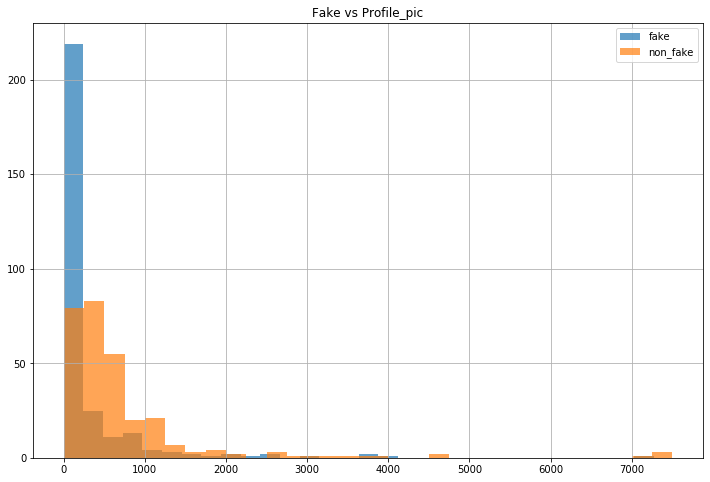

In [8]:
fig = plt.figure(figsize = (12,8))
plt.title("Fake vs Profile_pic")
fake_profile_pic.hist(alpha = 0.7, bins = 30, label = 'fake')
non_fake_profile_pic.hist(alpha = 0.7, bins = 30, label = 'non_fake')
plt.legend(loc = "upper right")

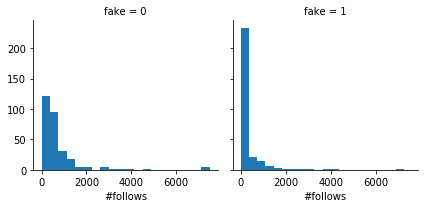

In [9]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, '#follows', bins = 20)

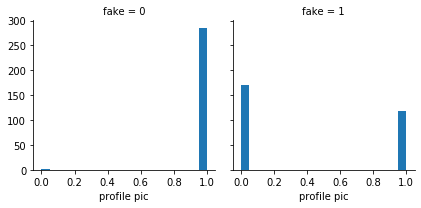

In [10]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'profile pic', bins = 20)

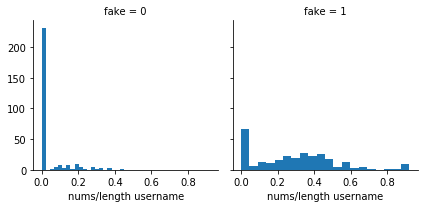

In [11]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'nums/length username', bins = 20)

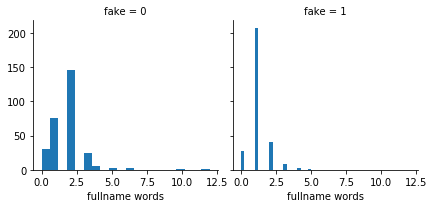

In [12]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'fullname words', bins = 20)

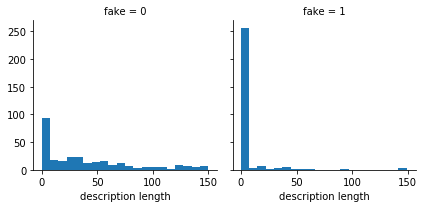

In [13]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'description length', bins = 20)

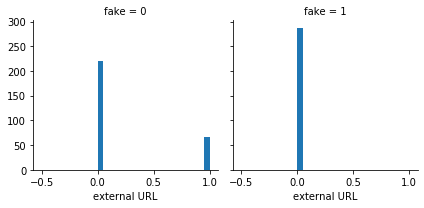

In [14]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'external URL', bins = 20)

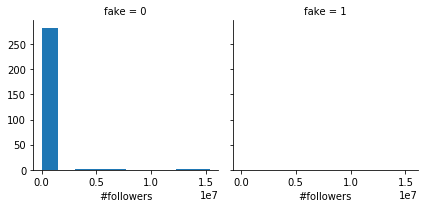

In [15]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, '#followers', bins = 10)

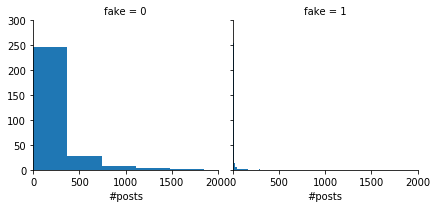

In [16]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, '#posts', bins = 20).set(xlim=(0,2000),ylim=(0,300))

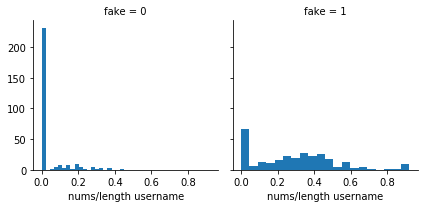

In [20]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'nums/length username', bins = 20)

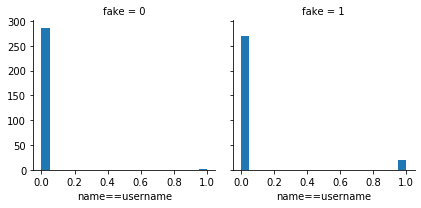

In [21]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'name==username', bins = 20)

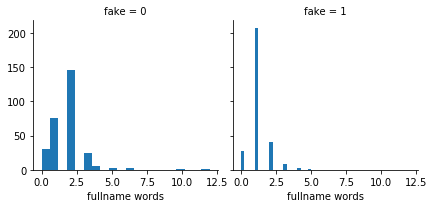

In [23]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'fullname words', bins = 20)

In [ ]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'nums/length fullname', bins = 10).set(xlim = (0,1), ylim = (0,200))
#g.set_xticklabels(step=1)

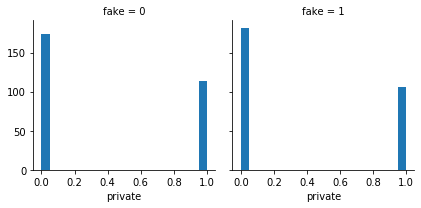

In [26]:
g = sns.FacetGrid(df_train, col = 'fake')
g.map(plt.hist, 'private', bins = 20)

In [60]:
df_train.drop(['profile pic','private'],axis = 1) # Droping columns based on above graph

,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,#posts,#followers,#follows,fake
0,0.27,0,0.00,0,53,0,32,1000,955,0
1,0.00,2,0.00,0,44,0,286,2740,533,0
2,0.10,2,0.00,0,0,0,13,159,98,0
3,0.00,1,0.00,0,82,0,679,414,651,0
4,0.00,2,0.00,0,0,0,6,151,126,0
5,0.00,4,0.00,0,81,1,344,669987,150,0
6,0.00,2,0.00,0,50,0,16,122,177,0
7,0.00,2,0.00,0,0,0,33,1078,76,0
8,0.00,0,0.00,0,71,0,72,1824,2713,0
9,0.00,2,0.00,0,40,1,213,12945,813,0


# Classification

In [61]:
X_train = df_train.drop(['profile pic','private','fake'],axis = 1)
Y_train = df_train["fake"]

In [62]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [63]:
X_test = df_test.drop(['profile pic','private','fake'],axis = 1)
Y_test = df_test["fake"]

In [64]:
dt = c.fit(X_train,Y_train)

In [65]:
y_pred = c.predict(X_test)

In [66]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test,y_pred) * 100

In [68]:
print("Accuracy using Decision Tree ", round(score, 1), "%")

Accuracy using Decision Tree  90.0 %


In [69]:
logisticRegr = LogisticRegression()

In [70]:
logisticRegr.fit(X_train,Y_train)

/home/dhruv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
log_pred = logisticRegr.predict(X_test)

In [72]:
score = accuracy_score(Y_test,log_pred) * 100

In [73]:
print("Accuracy using Logistic Regression ", round(score, 1), "%")

Accuracy using Logistic Regression  75.8 %
